In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:
data_set = pd.read_csv('tweets.csv')

In [3]:
data_set.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data_set.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
del data_set["airline_sentiment_gold"]

In [6]:
del data_set["negativereason_gold"]

In [7]:
del data_set["negativereason_confidence"]

In [8]:
data_set.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

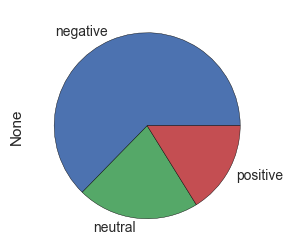

In [9]:
result = data_set.groupby('airline_sentiment').size() / data_set.groupby('airline_sentiment').size().sum()
result.plot(kind='pie', figsize=(3, 3))

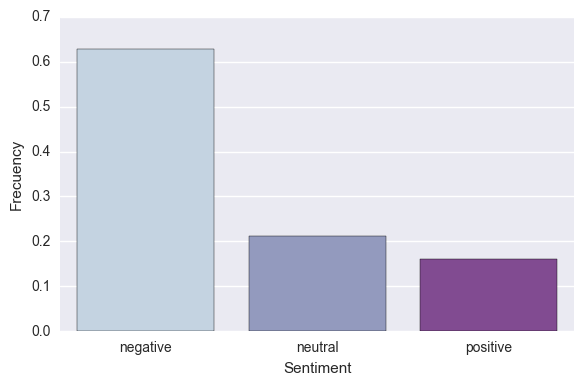

In [10]:
smallData = pd.DataFrame({'Sentiment' : list(result.axes[0]),'Frecuency':list(result.values)})
g = sb.factorplot(x="Sentiment", y="Frecuency", data=smallData, kind="bar",
                   palette="BuPu", size=4, aspect=1.5)

g.set_xticklabels()


In [11]:
result = data_set.groupby('airline').size() / data_set.groupby('airline').size().sum()

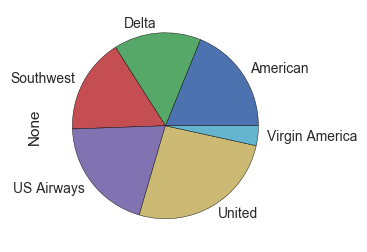

In [12]:
result.plot(kind='pie', figsize=(3, 3))

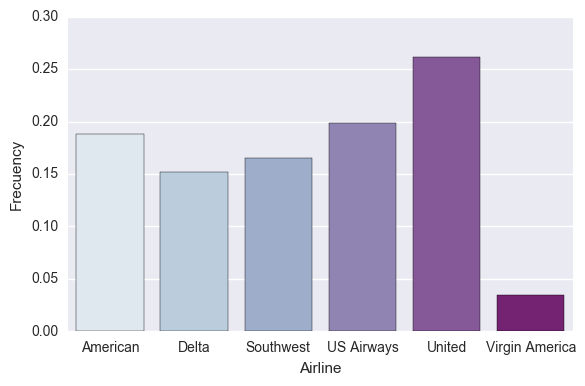

In [13]:
airlines = result.axes[0]
smallData = pd.DataFrame({'Airline' : list(result.axes[0]),'Frecuency':list(result.values)})
g = sb.factorplot(x="Airline", y="Frecuency", data=smallData, kind="bar",
                   palette="BuPu", size=4, aspect=1.5)

g.set_xticklabels()

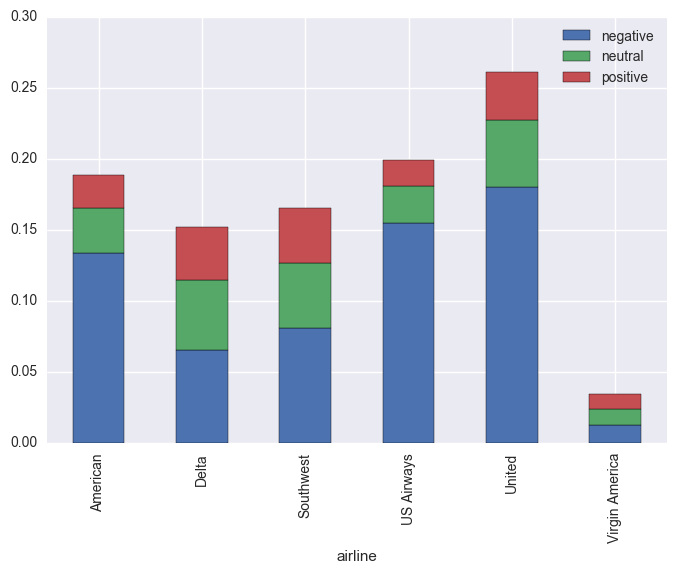

In [14]:
result = data_set.groupby(['airline','airline_sentiment']).size() / data_set.groupby(['airline','airline_sentiment']).size().sum()
array = np.array( list(result) )
shape = ( 6, 3 )
array = array.reshape(shape)
df2 = pd.DataFrame(array, columns=['negative', 'neutral', 'positive'])
df2['airlines'] = airlines
df2.plot(kind='bar', stacked=True,x=airlines);

In [15]:
result = data_set.groupby('negativereason').size() / data_set.groupby('negativereason').size().sum()
smallData = pd.DataFrame({'negativereason' : list(result.axes[0]),'Frecuency':list(result.values)})

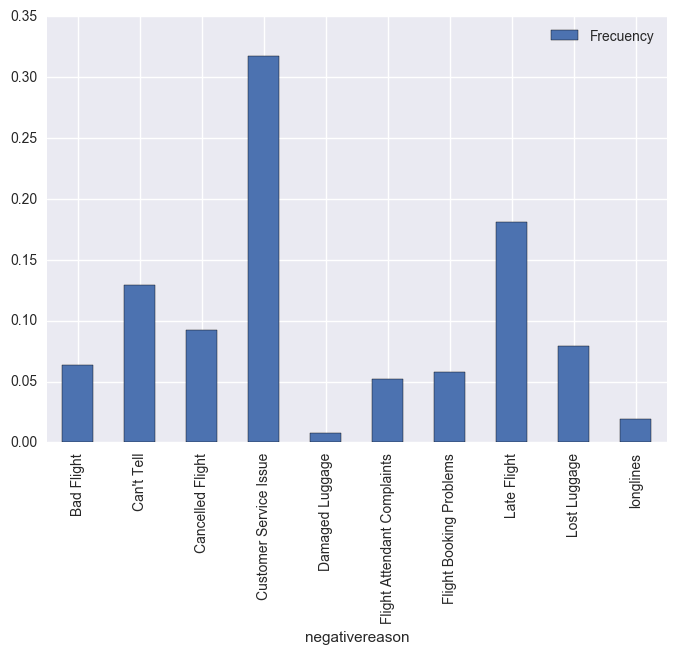

In [16]:
smallData.plot(kind='bar', stacked=True,x='negativereason');

In [17]:
result = data_set.groupby(['airline','negativereason']).size() / data_set.groupby(['airline','negativereason']).size().sum()


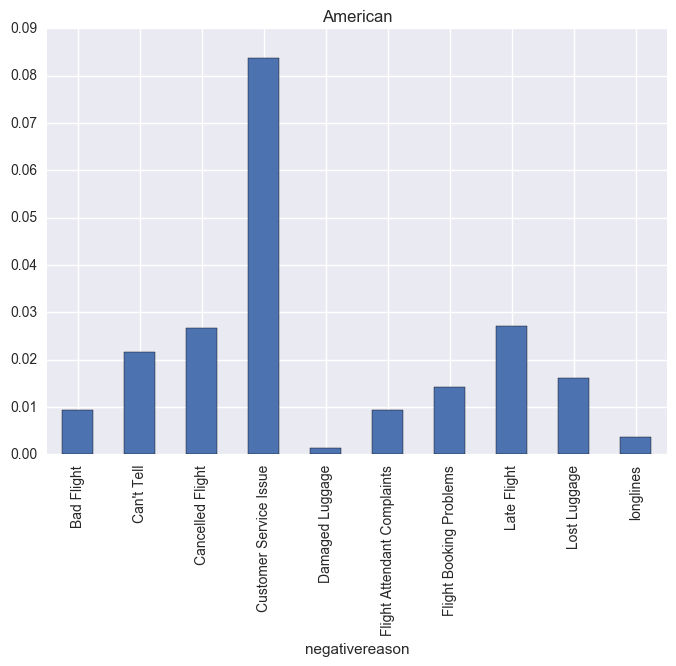

In [18]:
result['American'].plot(title = "American",kind='bar', stacked=True,x='negativereason');

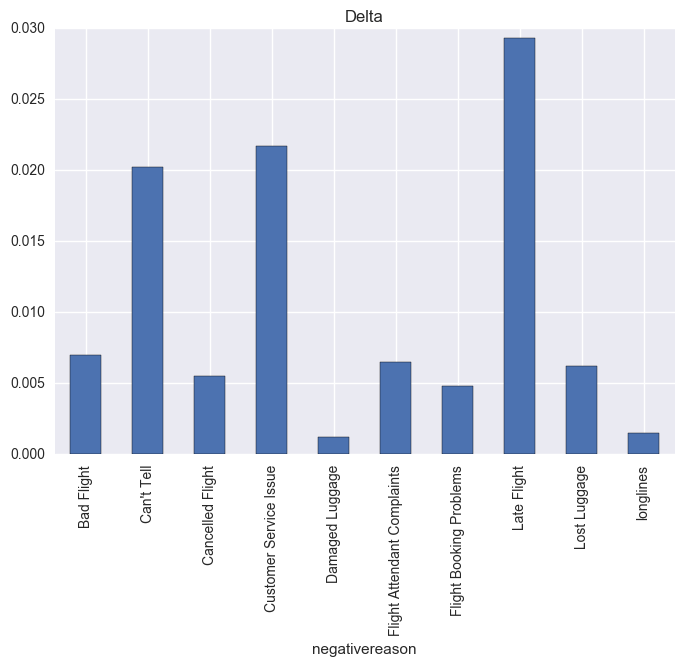

In [19]:
result['Delta'].plot(title = "Delta",kind='bar', stacked=True,x='negativereason');

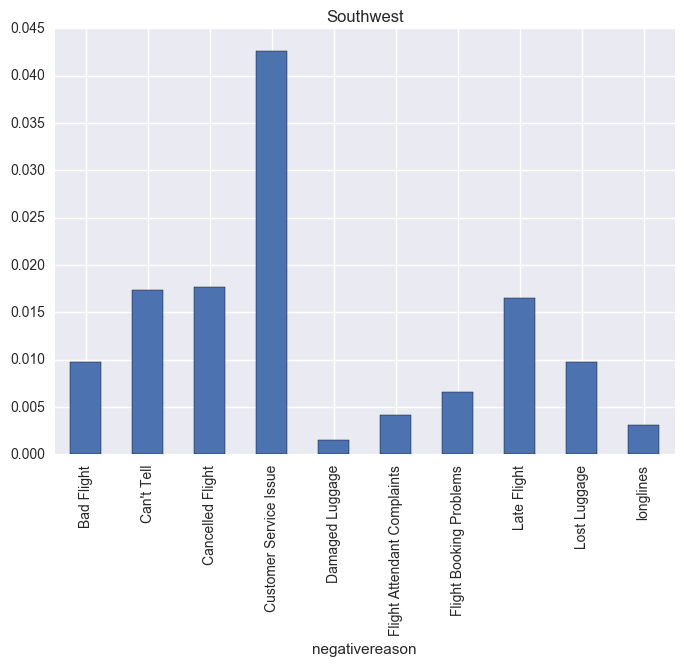

In [20]:
result['Southwest'].plot(title = "Southwest",kind='bar', stacked=True,x='negativereason');

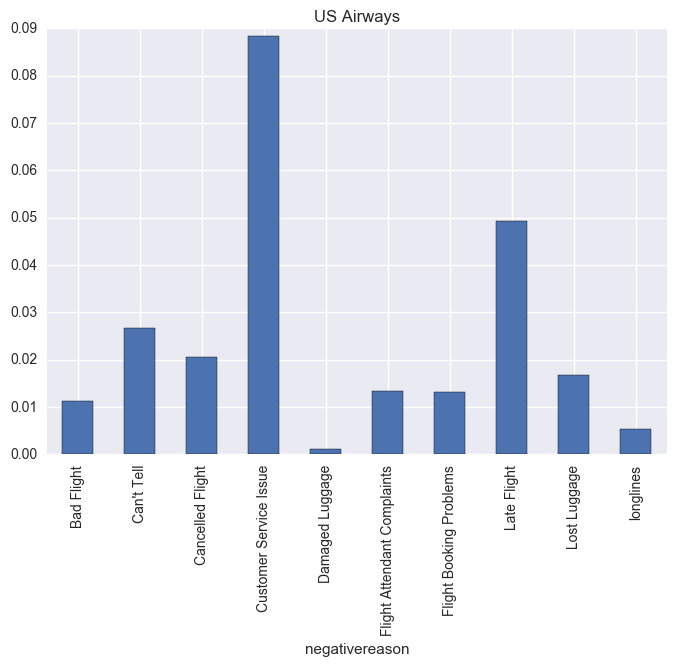

In [21]:
result['US Airways'].plot(title = "US Airways",kind='bar', stacked=True,x='negativereason');


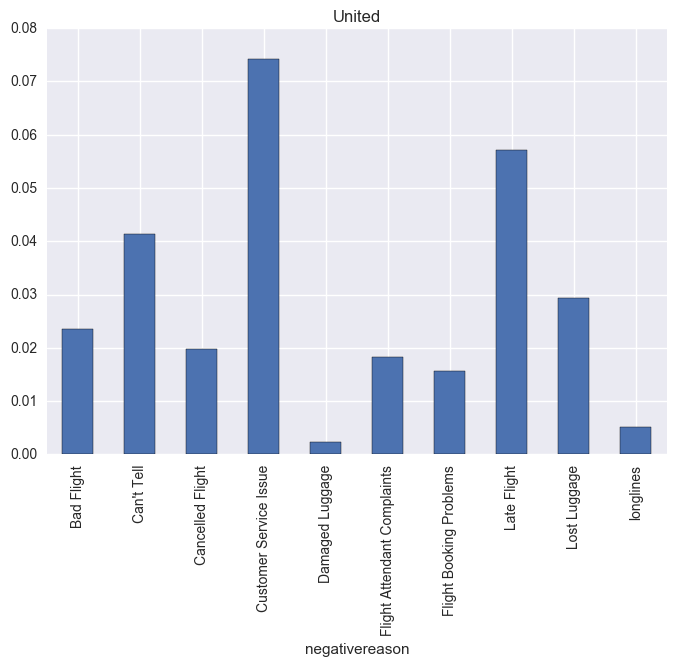

In [22]:
result['United'].plot(title = "United",kind='bar', stacked=True,x='negativereason');

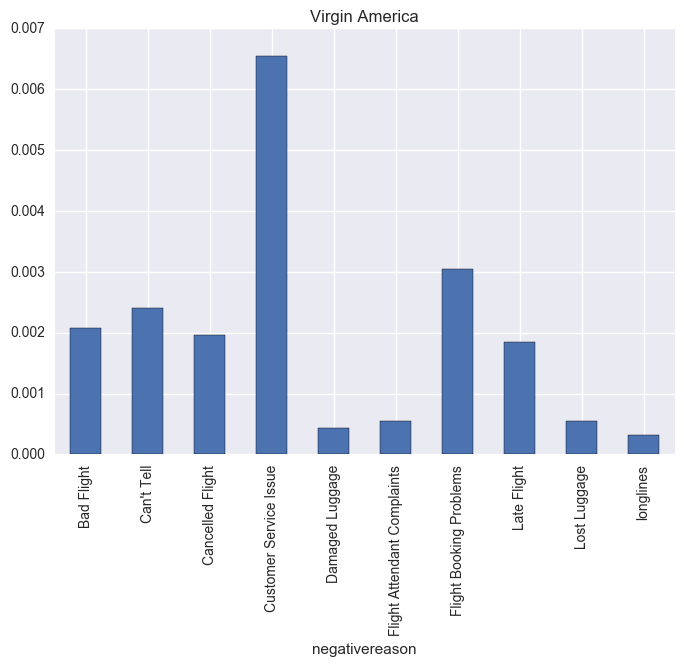

In [23]:
result['Virgin America'].plot(title = "Virgin America",kind='bar', stacked=True,x='negativereason');

In [24]:
data_set["tweet_location"].unique()

array([nan, 'Lets Play', 'San Francisco CA', ..., 'Columbus, OH, USA',
       'Milwaukee County, Wisconsin', 'Nigeria,lagos'], dtype=object)

In [25]:
timezona=data_set.groupby("user_timezone").size()/data_set.groupby("user_timezone").size().sum()
timezona=timezona.sort_values(ascending=False)
timezona.head(10)

user_timezone
Eastern Time (US & Canada)     0.381263
Central Time (US & Canada)     0.196640
Pacific Time (US & Canada)     0.123014
Quito                          0.075153
Atlantic Time (Canada)         0.050611
Mountain Time (US & Canada)    0.037576
Arizona                        0.023320
London                         0.019857
Alaska                         0.010998
Sydney                         0.010896
dtype: float64

In [26]:
timezonaNe=data_set.loc[data_set["airline_sentiment"]=='negative'].groupby(["user_timezone"]).size()/data_set.groupby(["user_timezone"]).size().sum()
timezonaNe=timezonaNe.sort_values(ascending=False)
timezonaNe.head()

user_timezone
Eastern Time (US & Canada)    0.235540
Central Time (US & Canada)    0.121283
Pacific Time (US & Canada)    0.073320
Quito                         0.053259
Atlantic Time (Canada)        0.030448
dtype: float64

In [27]:
df = data_set.loc[data_set['retweet_count']>4]
df = df.sort_values(by='retweet_count', ascending=False)

df = (df.loc[data_set['airline_sentiment']=="negative"])
df.negativereason.unique()

array(['Late Flight', "Can't Tell", 'Flight Booking Problems',
       'Cancelled Flight'], dtype=object)

In [28]:
dc=data_set[["name","airline_sentiment","tweet_coord","airline"]].dropna()
dc.groupby('airline_sentiment').size()

airline_sentiment
negative    663
neutral     181
positive    175
dtype: int64

In [29]:
dc=dc.loc[dc["tweet_coord"]!="[0.0, 0.0]"]
name=dc["name"].reset_index(drop=True)
airsent=dc["airline_sentiment"].reset_index(drop=True)
cord=dc["tweet_coord"].reset_index(drop=True)
airline=dc["airline"].reset_index(drop=True)

data_coord={'name' : name,'airline_sentiment' : airsent,'airline':airline,
           'tweet_coord':cord}
data_coord=pd.DataFrame(data_coord)
data_coord

,airline,airline_sentiment,name,tweet_coord
0,Virgin America,positive,DT_Les,"[40.74804263, -73.99295302]"
1,Virgin America,negative,blackjackpro911,"[42.361016, -71.02000488]"
2,Virgin America,neutral,TenantsUpstairs,"[33.94540417, -118.4062472]"
3,Virgin America,negative,Cuschoolie1,"[33.94209449, -118.40410103]"
4,Virgin America,positive,NorthTxHomeTeam,"[33.2145038, -96.9321504]"
5,Virgin America,neutral,GottAmanda,"[34.0219817, -118.38591198]"
6,Virgin America,neutral,adawson66,"[33.57963333, -117.73024772]"
7,Virgin America,negative,gianagon,"[40.6413712, -73.78311558]"
8,Virgin America,positive,mrmichaellay,"[36.08457854, -115.13780136]"
9,Virgin America,neutral,drcaseydrake,"[37.79374402, -122.39327564]"


In [30]:
coord=data_coord["tweet_coord"]
s1 = pd.Series(coord)
s1=s1.str.split(',', expand=True)
coordenadas={'Latitud' : s1[0],'Longitud' : s1[1]}
coordenadas=pd.DataFrame(coordenadas)
coordenadas["Latitud"]=coordenadas["Latitud"].str.replace("[", ' ', case=True)
coordenadas["Longitud"]=coordenadas["Longitud"].str.replace("]", ' ', case=True)
coordenadas["Latitud"]=pd.to_numeric(coordenadas["Latitud"])
coordenadas["Longitud"]=pd.to_numeric(coordenadas["Longitud"])

In [31]:
coordenadas

,Latitud,Longitud
0,40.748043,-73.992953
1,42.361016,-71.020005
2,33.945404,-118.406247
3,33.942094,-118.404101
4,33.214504,-96.932150
5,34.021982,-118.385912
6,33.579633,-117.730248
7,40.641371,-73.783116
8,36.084579,-115.137801
9,37.793744,-122.393276


In [32]:
del data_coord["tweet_coord"]
data_coord["Latitud"]=coordenadas["Latitud"]
data_coord["Longitud"]=coordenadas["Longitud"]
data_coord

,airline,airline_sentiment,name,Latitud,Longitud
0,Virgin America,positive,DT_Les,40.748043,-73.992953
1,Virgin America,negative,blackjackpro911,42.361016,-71.020005
2,Virgin America,neutral,TenantsUpstairs,33.945404,-118.406247
3,Virgin America,negative,Cuschoolie1,33.942094,-118.404101
4,Virgin America,positive,NorthTxHomeTeam,33.214504,-96.932150
5,Virgin America,neutral,GottAmanda,34.021982,-118.385912
6,Virgin America,neutral,adawson66,33.579633,-117.730248
7,Virgin America,negative,gianagon,40.641371,-73.783116
8,Virgin America,positive,mrmichaellay,36.084579,-115.137801
9,Virgin America,neutral,drcaseydrake,37.793744,-122.393276


In [33]:
data_coord['text'] = data_coord['name'] + '<br>Airline Sentiment: ' + data_coord['airline_sentiment']

In [34]:
import plotly.plotly as py
import pandas as pd
py.sign_in('AndersonCastillo', 'ygnzmk4act')

df = pd.read_csv('tweets.csv')
df.head()

#Codigo Modificado para Tweets
#Quitar los nulos y las coordenas 0.0,0.0
dc=df[["name","airline_sentiment","tweet_coord","airline","airline_sentiment_confidence"]].dropna()
dc=dc.loc[dc["tweet_coord"]!="[0.0, 0.0]"]
name=dc["name"].reset_index(drop=True)
airsent=dc["airline_sentiment"].reset_index(drop=True)
cord=dc["tweet_coord"].reset_index(drop=True)
airline=dc["airline"].reset_index(drop=True)
aconfi=dc["airline_sentiment_confidence"].reset_index(drop=True)

data_coord={'name' : name,'airline_sentiment' : airsent,'airline':airline,
           'tweet_coord':cord,'airline_sentiment_confidence':aconfi}
data_coord=pd.DataFrame(data_coord)

#Obtener la latitud y Longitud
coord=data_coord["tweet_coord"]
s1 = pd.Series(coord)
s1=s1.str.split(',', expand=True)
coordenadas={'Latitud' : s1[0],'Longitud' : s1[1]}
coordenadas=pd.DataFrame(coordenadas)
coordenadas["Latitud"]=coordenadas["Latitud"].str.replace("[", ' ', case=True)
coordenadas["Longitud"]=coordenadas["Longitud"].str.replace("]", ' ', case=True)
coordenadas["Latitud"]=pd.to_numeric(coordenadas["Latitud"])
coordenadas["Longitud"]=pd.to_numeric(coordenadas["Longitud"])

#Borrar las coordenadas como cadena y añaadir la latitud y longitud por separado
del data_coord["tweet_coord"]
data_coord["Latitud"]=coordenadas["Latitud"]
data_coord["Longitud"]=coordenadas["Longitud"]

###################################

data_coord['text'] = data_coord['name'] + '<br>Airline : '+ data_coord["airline"]+'<br>Airline Sentiment: ' + data_coord['airline_sentiment']
limits = ['positive','negative','neutral']
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(255,133,27)"]
cities = []
scale = 70

sentiments=["Positive","Negative","Neutral"]
#sentiments_color=[700000,800000,600000]

for i in range(len(limits)):
    lim = limits[i]
    df_sub = data_coord.loc[data_coord["airline_sentiment"]==limits[i]]
    city = dict(
        type = 'scattergeo',
        #locationmode = 'USA-states',
        lon = df_sub['Longitud'],
        lat = df_sub['Latitud'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub["airline_sentiment_confidence"]*scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = sentiments[i] )
    cities.append(city)

layout = dict(
        title = 'Localizacion de Tweets a nivel Mundial-Febrero 2015<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='world',
            #projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

In [35]:
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csc_matrix
from wordcloud import WordCloud
import nltk  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [38]:
data_set["text"]=data_set["text"].str.replace("^@\\w+ *", "", case=True)

In [39]:
data_set=data_set[["airline_sentiment","negativereason","airline","text"]]

In [40]:
positive=data_set.loc[data_set["airline_sentiment"]=="positive"]
negative=data_set.loc[data_set["airline_sentiment"]=="negative"]

In [41]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
positive=positive.reset_index(drop=True)
for i in range(len(positive["text"])):
    #tokenizer
    w=word_tokenize(positive["text"][i])
    #stopwords y lower
    w1=[]
    for j in w:#lower
        w1.append(str.lower(j))
    words = [w2 for w2 in w1 if not w2 in stop_words]#stopwords
    #stemming
    tweet=[]
    for k in words:
        #tweet.append(ps.stem(k))
        tweet.append(lemmatizer.lemmatize(k))
    positive["text"][i]=""
    for k in tweet:
        positive["text"][i]+=k
        positive["text"][i]+=" "
positive["text"]=positive["text"].str.replace("^@\\w+ *!,.", "", case=True)

In [42]:
positive

,airline_sentiment,negativereason,airline,text
0,positive,NaN,Virgin America,plus 've added commercial experience ... tacky .
1,positive,NaN,Virgin America,"yes , nearly every time fly vx “ear worm” won’..."
2,positive,NaN,Virgin America,"well , didn't…but ! : -d"
3,positive,NaN,Virgin America,"amazing , arrived hour early . 're good ."
4,positive,NaN,Virgin America,& lt ; 3 pretty graphic . much better minimal ...
5,positive,NaN,Virgin America,great deal ! already thinking 2nd trip @ austr...
6,positive,NaN,Virgin America,@ virginmedia 'm flying # fabulous # seductive...
7,positive,NaN,Virgin America,thanks !
8,positive,NaN,Virgin America,excited first cross country flight lax mco 've...
9,positive,NaN,Virgin America,❤️ flying @ virginamerica . ☺️👍


In [43]:
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = None,
                lowercase = True,
                stop_words = 'english')
vectorizer.build_preprocessor()
vectorizer.build_tokenizer()

words = vectorizer.fit_transform(positive["text"])
names=vectorizer.get_feature_names()
parame=vectorizer.get_params()
stopwords=vectorizer.get_stop_words()

In [44]:
words = words.todense()
words

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
words = pd.DataFrame(words,columns=names)
wordsum=words.sum()
wordsum.sort_values(ascending=False).head()


thanks    611
thank     455
flight    441
great     236
http      233
dtype: int64

In [49]:
f=wordsum.get_values()
n=pd.Series(wordsum.index)


In [50]:
palabras=""
for i in range(len(n)):
    cantpal=f[i]
    for j in range(cantpal):
        palabras += n[i]
        palabras += " "

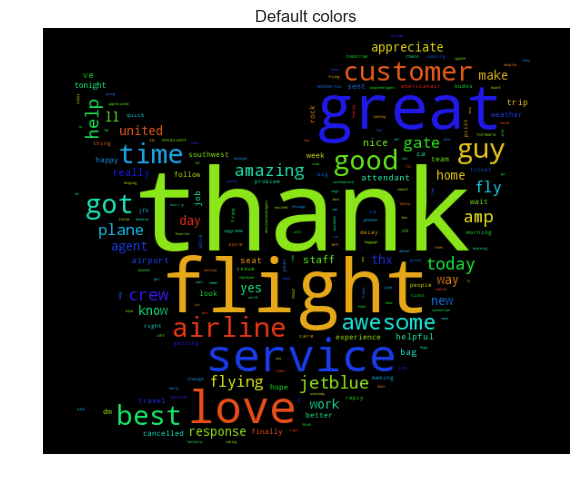

In [52]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random



def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):

    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)



d = path.dirname("__file__")


mask = np.array(Image.open(path.join(d, "twitter.png")))


wc = WordCloud(mask=mask, margin=10,

               random_state=1).generate(palabras)

# store default colored image


plt.figure()
plt.title("Default colors")
plt.imshow(default_colors)
wc.to_file("WordCloud.png")
plt.axis("off")

plt.show()

In [63]:
#CLustering
from sklearn import datasets, cluster
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
X = np.array(words)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_




In [56]:
cluster1 = []
cluster2 = []
cluster3 = []

for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        cluster1.append(positive["text"][i])
    else:
        if kmeans.labels_[i] == 1:
            cluster2.append(positive["text"][i])
        else:
            if kmeans.labels_[i]== 2:
                cluster3.append(positive["text"][i])

In [57]:
cluster1

["plus 've added commercial experience ... tacky . ",
 'yes , nearly every time fly vx “ear worm” won’t go away : ) ',
 "well , didn't…but ! : -d ",
 "amazing , arrived hour early . 're good . ",
 '& lt ; 3 pretty graphic . much better minimal iconography . : ',
 "great deal ! already thinking 2nd trip @ australia & amp ; n't even gone 1st trip yet ! ; p ",
 'thanks ! ',
 '❤️ flying @ virginamerica . ☺️👍 ',
 'know would amazingly awesome ? bos-fll please ! ! ! ! ! ! ! want fly . ',
 'love hipster innovation . feel good brand . ',
 'moodlighting way fly ! best experience ever ! cool calming . 💜✈ # moodlitmonday ',
 '@ freddieawards done done ! best airline around , hand ! ',
 "'m # elevategold good reason : rock ! ! ",
 'wow blew mind ',
 '@ ladygaga @ carrieunderwood julie andrew way though @ ladygaga impressive ! @ carrieunderwood ',
 'know . need spotify stat # guiltypleasures ',
 "@ ladygaga @ carrieunderwood 'm lady gaga ! ! ! amazing ! 😊 ",
 "@ ladygaga @ carrieunderwood love thre

In [58]:
cluster2

["excited first cross country flight lax mco 've heard nothing great thing virgin america . # 29daystogo ",
 'love team running gate e9 la tonight . waited delayed flight , kept thing entertaining ',
 'completely awesome experience last month bos-las nonstop . thanks awesome flight depart time . # vabeatsjblue ',
 'rock making watch # oscar flight ! ! # redcarpet # oscar # oscars2015 ',
 'thanks great flight la boston ! pilot great job landing snow . go back la ? # seriously ',
 'i’m looking forward watching oscar flight home tomorrow . might even get something bubbly drink ! ; ) ',
 'love 90 music blasting gate # boston waiting flight # sanfrancisco . could get iced coffee ! ',
 'thanks ! good time back ! # vodkatonics entire flight🍸 # sfo ',
 'thanks gate checking baggage full flight dfw-lax 883 giving early boarding # sweet ',
 "loved . ca n't wait monday 's return flight ... mostly watch inflight safety video . # sorrynotsorry ",
 'free drink flight back free promo ? ',
 'thanks ta

In [59]:
cluster3

["@ virginmedia 'm flying # fabulous # seductive sky ! u take # stress away travel http : //t.co/ahlxhhkiyn ",
 'love graphic . http : //t.co/ut5grrwaaa ',
 'great news ! america could start flight hawaii end year http : //t.co/r8p2zy3fe4 via @ pacificbiznews ',
 'view downtown los angeles , hollywood sign , beyond rain mountain ! http : //t.co/dw5nf0ibtr ',
 'congrats winning @ travelzoo award best deal airline ( u ) http : //t.co/kj1iljaebv ',
 'getaway deal may , $ 59 one-way . lot cool city http : //t.co/tzzjhuibch # cheapflights # farecompare ',
 'getaway deal may , $ 59 one-way . lot cool city http : //t.co/b2xi4yg5t8 # cheapflights # farecompare ',
 'come back # phl already . need take u horrible cold . # pleasecomeback http : //t.co/glxfwp6nqh ',
 "# flight home # dc # sunset # globe ' # backtowinter back # work ! # refreshed http : //t.co/vx9vbctdlf ",
 '😎 rt @ virginamerica : you’ve met match . got status another airline ? upgrade ( +restr ) : http : //t.co/rhkamx9vf5 . http 